In [1]:
%reload_ext autoreload
%autoreload 2

In [1]:
from pathlib import Path
import sys
from concurrent.futures import ProcessPoolExecutor, as_completed

from tqdm import tqdm_notebook as tqdm
import numpy as np
from Bio.SCOP import Scop
from Bio import SeqIO

sys.path.append(Path().resolve().parent.as_posix())
from machina.generate_models import TMalignModel


def _process(args):
    alignments = SeqIO.index('../data/train/scop40_structural_alignment.fasta', 'fasta')
    for a in args:
        try:
            TMalignModel().generate_protein_model(a[0], a[1], alignments, a[3], a[4])
        except Exception as e:
            print(e)


scop_root = Scop(dir_path='../data/train', version='1.75')
test_domain = np.load('../data/test_domain_ids.npy')
scop40 = SeqIO.index('../data/train/astral-scopdom-seqres-gd-sel-gs-bib-40-1.75.fa', 'fasta')
with ProcessPoolExecutor() as executor:
    futures = []
    for query in test_domain:
        domains = [_.sid for _ in scop_root.getDomainBySid(query).getAscendent('sf').getDescendents('px')
                   if _.sid in scop40 and _.sid != query]
        args = [(query, _, None, f'../data/train/pdbstyle-1.75/{_[2:4]}', f'../data/evaluation/tmalign/{query}')
                for _ in domains]
        futures.append(executor.submit(_process, args))
    [_ for _ in tqdm(as_completed(futures), total=len(futures))] # 15min

  0%|          | 0/35 [00:00<?, ?it/s]/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)
 51%|█████▏    | 18/35 [00:56<01:03,  3.76s/it]/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)
 54%|█████▍    | 19/35 [01:03<01:16,  4.80s/it]/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)
 74%|███████▍  | 26/35 [02:11<01:15,  8.35s/it]/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)
/home/makigaki/.local/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:200: PDBConstructionWarning: Negative occupancy in one or more atoms
  warnings.warn("

In [1]:
from pathlib import Path
import sys
from concurrent.futures import ProcessPoolExecutor, as_completed

from tqdm import tqdm_notebook as tqdm
import numpy as np
from Bio.SCOP import Scop
from Bio import SeqIO

sys.path.append(Path().resolve().parent.as_posix())
from machina.generate_models import SWModel


def _process(args):
    aligns = SeqIO.index('../data/train/scop40_structural_alignment.fasta', 'fasta')
    for a in args:
        SWModel(-11, -1).generate_protein_model(a[0], a[1], aligns, a[3], a[4])


scop_root = Scop(dir_path='../data/train', version='1.75')
test_domain = np.load('../data/test_domain_ids.npy')
scop40 = SeqIO.index('../data/train/astral-scopdom-seqres-gd-sel-gs-bib-40-1.75.fa', 'fasta')
with ProcessPoolExecutor() as executor:
    futures = []
    for query in test_domain:
        domains = [_.sid for _ in scop_root.getDomainBySid(query).getAscendent('sf').getDescendents('px')
                   if _.sid in scop40 and _.sid != query]
        args = [(query, _, None, f'../data/train/pdbstyle-1.75/{_[2:4]}',
                 f'../data/evaluation/sw_open11_ext1/{query}') for _ in domains]
        futures.append(executor.submit(_process, args))
    [_ for _ in tqdm(as_completed(futures), total=len(futures))]

  0%|          | 0/35 [00:00<?, ?it/s]/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)
 51%|█████▏    | 18/35 [00:54<00:57,  3.41s/it]/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)
 57%|█████▋    | 20/35 [01:21<02:16,  9.09s/it]/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)
 69%|██████▊   | 24/35 [01:51<01:13,  6.68s/it]/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)
 74%|███████▍  | 26/35 [02:12<01:14,  8.29s/it]/home/makigaki/.local/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:200: PDBConstructionWarning: Negative o

## {PSI,DELTA}-BLAST

In [1]:
from pathlib import Path
import sys

import numpy as np
from tqdm import tqdm_notebook as tqdm
from Bio.SCOP import Scop
from Bio import SeqIO

sys.path.append(Path().resolve().parent.as_posix())
from machina.generate_models import BLASTModel


scop_root = Scop(dir_path='../data/train', version='1.75')
test_domain = np.load('../data/test_domain_ids.npy')
scop40 = SeqIO.index('../data/train/astral-scopdom-seqres-gd-sel-gs-bib-40-1.75.fa', 'fasta')
for query in tqdm(test_domain):
    domains = [_.sid for _ in scop_root.getDomainBySid(query).getAscendent('sf').getDescendents('px') if _.sid in scop40]
    for domain in domains:
        BLASTModel('psiblast', '/data/DB/blastdb').generate_pairwise_alignment(
            query, domain, '../data/evaluation/psiblast', '../data/train/pssm')  # 1min

In [2]:
from pathlib import Path
import sys

import numpy as np
from tqdm import tqdm_notebook as tqdm
from Bio.SCOP import Scop
from Bio import SeqIO

sys.path.append(Path().resolve().parent.as_posix())
from machina.generate_models import BLASTModel


scop_root = Scop(dir_path='../data/train', version='1.75')
test_domain = np.load('../data/test_domain_ids.npy')
scop40 = SeqIO.index('../data/train/astral-scopdom-seqres-gd-sel-gs-bib-40-1.75.fa', 'fasta')
for query in tqdm(test_domain):
    domains = [_.sid for _ in scop_root.getDomainBySid(query).getAscendent('sf').getDescendents('px') if _.sid in scop40]
    for domain in domains:
        BLASTModel('deltablast', '/data/DB/blastdb').generate_pairwise_alignment(
            query, domain, '../data/evaluation/deltablast', '../data/train/pssm') # 15min

In [3]:
from pathlib import Path
import sys
import os
from concurrent.futures import ThreadPoolExecutor, as_completed

import numpy as np
from Bio.SCOP import Scop
from Bio import SeqIO
from tqdm import tqdm_notebook as tqdm

sys.path.append(Path().resolve().parent.as_posix())
from machina.generate_models import BLASTModel


def _process(args):
    for a in args:
        BLASTModel('psiblast', '/data/DB/blastdb').generate_protein_model(a[0], a[1], a[2], a[3], a[4])


scop_root = Scop(dir_path='../data/train', version='1.75')
test_domain = np.load('../data/test_domain_ids.npy')
scop40 = SeqIO.index('../data/train/astral-scopdom-seqres-gd-sel-gs-bib-40-1.75.fa', 'fasta')
with ThreadPoolExecutor(max_workers=os.cpu_count()) as executor:
    futures = []
    for query in test_domain:
        domains = [_.sid for _ in scop_root.getDomainBySid(query).getAscendent('sf').getDescendents('px')
                   if _.sid in scop40 and _.sid != query]
        args = [(query, _,
                 f'../data/evaluation/psiblast/{query}/{_}.xml',
                 f'../data/evaluation/psiblast/{query}',
                 f'../data/train/pdbstyle-1.75/{_[2:4]}') for _ in domains]
        futures.append(executor.submit(_process, args))
    [_ for _ in tqdm(as_completed(futures), total=len(futures))] # 8 min

/home/makigaki/.local/lib/python3.6/site-packages/Bio/SearchIO/_legacy/NCBIStandalone.py:45: BiopythonWarning: Parsing BLAST plain text output file is not a well supported functionality anymore. Consider generating your BLAST output for parsing as XML or tabular format instead.
  BiopythonWarning


/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)
/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)
/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)
/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)
/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)


In [4]:
from pathlib import Path
import sys
import os
from concurrent.futures import ThreadPoolExecutor, as_completed

import numpy as np
from Bio.SCOP import Scop
from Bio import SeqIO
from tqdm import tqdm_notebook as tqdm

sys.path.append(Path().resolve().parent.as_posix())
from machina.generate_models import BLASTModel


def _process(args):
    for a in args:
        BLASTModel('deltablast', '/data/DB/blastdb').generate_protein_model(a[0], a[1], a[2], a[3], a[4])


scop_root = Scop(dir_path='../data/train', version='1.75')
test_domain = np.load('../data/test_domain_ids.npy')
scop40 = SeqIO.index('../data/train/astral-scopdom-seqres-gd-sel-gs-bib-40-1.75.fa', 'fasta')
with ThreadPoolExecutor(max_workers=os.cpu_count()) as executor:
    futures = []
    for query in test_domain:
        domains = [_.sid for _ in scop_root.getDomainBySid(query).getAscendent('sf').getDescendents('px')
                   if _.sid in scop40 and _.sid != query]
        args = [(query, _,
                 f'../data/evaluation/deltablast/{query}/{_}.xml',
                 f'../data/evaluation/deltablast/{query}',
                 f'../data/train/pdbstyle-1.75/{_[2:4]}') for _ in domains]
        futures.append(executor.submit(_process, args))
    [_ for _ in tqdm(as_completed(futures), total=len(futures))] # 9 min

/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)
/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)
/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)
/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)
/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)


## HHsearch

In [1]:
from pathlib import Path
import sys

import numpy as np
from Bio.SCOP import Scop
from Bio import SeqIO
from tqdm import tqdm_notebook as tqdm

sys.path.append(Path().resolve().parent.as_posix())
from machina.generate_models import HHSearchModel


scop_root = Scop(dir_path='../data/train', version='1.75')
test_domain = np.load('../data/test_domain_ids.npy')
scop40 = SeqIO.index('../data/train/astral-scopdom-seqres-gd-sel-gs-bib-40-1.75.fa', 'fasta')
for query in tqdm(test_domain):
    domains = [_.sid for _ in scop_root.getDomainBySid(query).getAscendent('sf').getDescendents('px') if _.sid != query]
    for domain in domains:
        HHSearchModel('/data/DB/hhsuitedb').generate_pairwise_alignment(
            query, domain, scop40[query], f'../data/evaluation/hhsearch/{query}') # 3min

In [1]:
from pathlib import Path
import sys

from tqdm import tqdm_notebook as tqdm
import numpy as np
from Bio.SCOP import Scop
from Bio import SeqIO

sys.path.append(Path().resolve().parent.as_posix())
from machina.generate_models import HHSearchModel


def _process(args):
    for a in args:
        HHSearchModel('/data/DB/hhsuitedb').generate_protein_model(a[0], a[1], a[2], a[3])


scop_root = Scop(dir_path='../data/train', version='1.75')
test_domain = np.load('../data/test_domain_ids.npy')
scop40 = SeqIO.index('../data/train/astral-scopdom-seqres-gd-sel-gs-bib-40-1.75.fa', 'fasta')
for query in tqdm(test_domain):
    domains = [_.sid for _ in scop_root.getDomainBySid(query).getAscendent('sf').getDescendents('px') if _.sid != query]
    args = [(query, _, f'../data/evaluation/hhsearch/{query}', f'../data/evaluation/hhsearch/pdbstyle-1.75/{_[2:4]}') for _ in domains]
    _process(args)  # 10 min

,PSI-BLAST,DELTA-BLAST,HHsearch,Smith-Waterman,Proposed,Proposedw3,Structural alignment
count,417.000000,396.000000,184.000000,909.000000,909.000000,909.000000,909.000000
mean,0.306952,0.355269,0.398925,0.434181,0.497454,0.489363,0.551146
std,0.270264,0.285271,0.226011,0.192119,0.182562,0.184489,0.196818
min,0.021330,0.027830,0.021340,0.087290,0.119160,0.119160,0.099470
25%,0.079260,0.100967,0.257830,0.294360,0.337870,0.332890,0.362080
50%,0.174900,0.220970,0.374820,0.370140,0.459410,0.445690,0.532100
75%,0.587490,0.683695,0.498070,0.569480,0.641870,0.641590,0.741430
max,0.924610,0.901870,0.871460,0.934810,0.934810,0.934810,0.944050


CPU times: user 15.1 s, sys: 1min 5s, total: 1min 20s
Wall time: 6min 14s


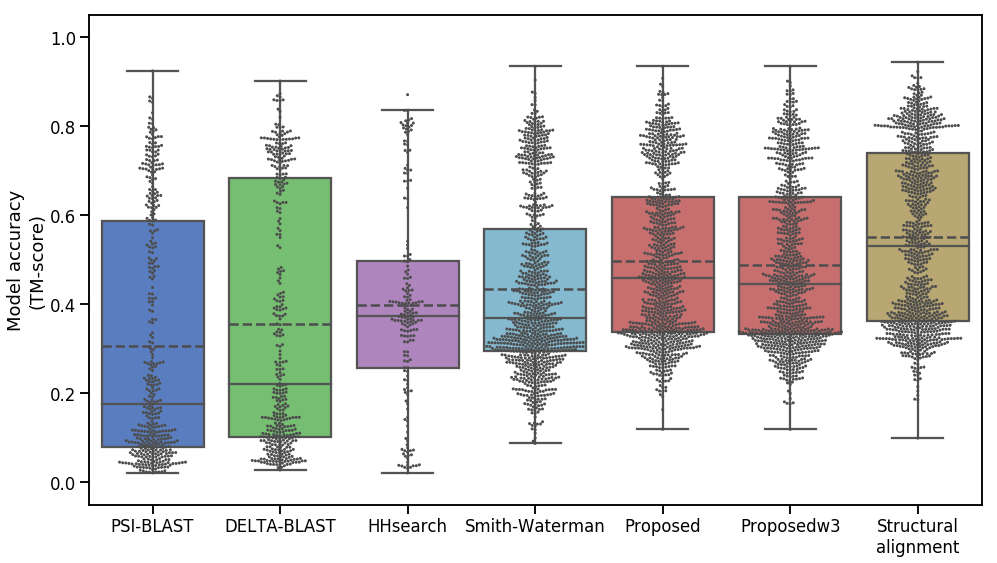

In [3]:
%%time
%matplotlib inline

from datetime import datetime
from pathlib import Path
import sys

from Bio.SCOP import Scop
from IPython.display import display
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot
import seaborn
import pandas
import numpy as np
from Bio import SeqIO

sys.path.append(Path().resolve().parent.as_posix())
from machina.TMtoolsCommandLine import TMalignCommandLine

pal = seaborn.color_palette([
    (0.2823529411764706, 0.47058823529411764, 0.8117647058823529), # PSI-BLAST
    (0.41568627450980394, 0.8, 0.396078431372549), # DELTA-BLAST
    (0.7058823529411765, 0.48627450980392156, 0.7803921568627451), # HHsearch
    (0.4666666666666667, 0.7450980392156863, 0.8588235294117647), # SW
    (0.8392156862745098, 0.37254901960784315, 0.37254901960784315), # Proposed
    (0.8392156862745098, 0.37254901960784315, 0.37254901960784315), # Proposedw3
    (0.7686274509803922, 0.6784313725490196, 0.4), # TM-align
])
scop_root = Scop(dir_path='../data/train', version='1.75')
test_domain = np.load('../data/test_domain_ids.npy')
scop40 = SeqIO.index('../data/train/astral-scopdom-seqres-gd-sel-gs-bib-40-1.75.fa', 'fasta')

result_d = {}
for query in tqdm(test_domain):
    templates = [_.sid for _ in scop_root.getDomainBySid(query).getAscendent('sf').getDescendents('px') if _.sid != query]
    key = 'PSI-BLAST'
    result_d.setdefault(key, [])
    for template in [_ for _ in templates if Path(f'../data/evaluation/psiblast/{query}/{_}.pdb').exists()]:
        tmalign = TMalignCommandLine(f'../data/evaluation/psiblast/{query}/{template}.pdb',
                                     f'../data/train/pdbstyle-1.75/{query[2:4]}/{query}.ent')
        tmalign.run()
        if tmalign.tmscore is None:
            continue
        result_d[key].append(tmalign.tmscore[1])
    key = 'DELTA-BLAST'
    result_d.setdefault(key, [])
    for template in [_ for _ in templates if Path(f'../data/evaluation/deltablast/{query}/{_}.pdb').exists()]:
        tmalign = TMalignCommandLine(f'../data/evaluation/deltablast/{query}/{template}.pdb',
                                     f'../data/train/pdbstyle-1.75/{query[2:4]}/{query}.ent')
        tmalign.run()
        if tmalign.tmscore is None:
            continue
        result_d[key].append(tmalign.tmscore[1])
    key = 'HHsearch'
    result_d.setdefault(key, [])
    for template in [_ for _ in templates if Path(f'../data/evaluation/hhsearch/{query}/{_}.pdb').exists()]:
        tmalign = TMalignCommandLine(f'../data/evaluation/hhsearch/{query}/{template}.pdb',
                                     f'../data/evaluation/hhsearch/pdbstyle-1.75/{query[2:4]}/{query}.ent')
        tmalign.run()
        if tmalign.tmscore is None:
            continue
        result_d[key].append(tmalign.tmscore[1])
    key = 'Smith-Waterman'
    result_d.setdefault(key, [])
    for template in [_ for _ in templates if Path(f'../data/evaluation/sw_open11_ext1/{query}/{_}.pdb').exists()]:
        tmalign = TMalignCommandLine(f'../data/evaluation/sw_open11_ext1/{query}/{template}.pdb',
                                     f'../data/train/pdbstyle-1.75/{query[2:4]}/{query}.ent')
        tmalign.run()
        if tmalign.tmscore is None:
            continue
        result_d[key].append(tmalign.tmscore[1])
    key = 'Proposed'
    result_d.setdefault(key, [])
    for template in [_ for _ in templates if Path(f'../data/results/flann19_scop40_logscore_tmscore0.5_window5_ratio0.1_nn1000_open0.1_extend0.01/{query}/{_}.pdb').exists()]:
        tmalign = TMalignCommandLine(f'../data/results/flann19_scop40_logscore_tmscore0.5_window5_ratio0.1_nn1000_open0.1_extend0.01/{query}/{template}.pdb',
                                     f'../data/train/pdbstyle-1.75/{query[2:4]}/{query}.ent')
        tmalign.run()
        if tmalign.tmscore is None:
            continue
        result_d[key].append(tmalign.tmscore[1])
    key = 'Proposedw3'
    result_d.setdefault(key, [])
    for template in [_ for _ in templates if Path(f'../results/flann19_scop40_logscore_tmscore0.5_window3_ratio0.1_nn1000_open0.1_extend0.01/{query}/{_}.pdb').exists()]:
        tmalign = TMalignCommandLine(f'../results/flann19_scop40_logscore_tmscore0.5_window3_ratio0.1_nn1000_open0.1_extend0.01/{query}/{template}.pdb',
                                     f'../data/train/pdbstyle-1.75/{query[2:4]}/{query}.ent')
        tmalign.run()
        if tmalign.tmscore is None:
            continue
        result_d[key].append(tmalign.tmscore[1])
    key = 'Structural\nalignment'
    result_d.setdefault(key, [])
    for template in [_ for _ in templates if Path(f'../data/evaluation/tmalign/{query}/{_}.pdb').exists()]:
        tmalign = TMalignCommandLine(f'../data/evaluation/tmalign/{query}/{template}.pdb',
                                     f'../data/train/pdbstyle-1.75/{query[2:4]}/{query}.ent')
        tmalign.run()
        if tmalign.tmscore is None:
            continue
        result_d[key].append(tmalign.tmscore[1])

result_df = pandas.DataFrame.from_dict(result_d, orient='index')
result_df = result_df.transpose()
display(result_df.describe())

seaborn.set_context('talk')
fig, ax = pyplot.subplots(figsize=(16, 9))
ax.set_ylabel('Model accuracy\n(TM-score)')
ax.set_ylim(bottom=-0.05, top=1.05)
seaborn.boxplot(data=result_df, ax=ax, showmeans=True, meanline=True, showfliers=False,
                palette=pal, meanprops={'color': '.3', 'linewidth': 2.5},
                flierprops={'markersize': 8, 'marker': 'x', 'markerfacecolor': '.3', 'markeredgewidth': 1.3})
seaborn.swarmplot(data=result_df, ax=ax, color='.3', size=3, linewidth=0)
fig.savefig('boxplot_domain_pairs_tmscore.pdf', bbox_inches='tight', pad_inches = 0) # 4min